In [20]:
import pandas as pd

input_path = 'dataset/cleaned_data_export.csv'
input_csv = pd.read_csv(input_path)

train = input_csv.drop(columns='sii')
y = input_csv['sii']

train.shape, y.shape

((2736, 79), (2736,))

# kNN

### priova numero 1 proviamo il kNN per valori di k tra 1 e 100 senza nessun tipo di scalabilità dei dati in input

In [21]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
lower_bound = 1
upper_bound = 100
region = range(lower_bound, upper_bound)
graph_accuaracies = []
graph_scores = []

In [23]:
import matplotlib.pyplot as plt
def print_analysis():
    plt.figure(figsize=(12, 6))
    plt.plot(region, graph_accuaracies, label='Test Accuracy', marker='o')
    plt.plot(region, graph_scores, label='Cross-Validation Score', marker='x')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Score')
    plt.title('Accuracy and Cross-Validation Score vs. k')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.20, random_state=42)

graph_accuaracies = []
graph_scores      = []

for k in region: # try k from 1 to 100

    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train, y_train )
    y_pred = kNN.predict( X_test )

    # compute Accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    graph_accuaracies.append(acc)
    scr = cross_val_score(kNN, train, y, cv=5).mean()
    graph_scores.append(scr)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc), " | Cross validation score {:.3f}".format(scr))

k:  1 | Accuracy 0.540  | Cross validation score 0.480
k:  2 | Accuracy 0.584  | Cross validation score 0.550
k:  3 | Accuracy 0.555  | Cross validation score 0.534
k:  4 | Accuracy 0.558  | Cross validation score 0.548
k:  5 | Accuracy 0.553  | Cross validation score 0.549
k:  6 | Accuracy 0.573  | Cross validation score 0.557
k:  7 | Accuracy 0.569  | Cross validation score 0.559
k:  8 | Accuracy 0.582  | Cross validation score 0.574
k:  9 | Accuracy 0.591  | Cross validation score 0.576
k: 10 | Accuracy 0.595  | Cross validation score 0.572
k: 11 | Accuracy 0.580  | Cross validation score 0.574
k: 12 | Accuracy 0.582  | Cross validation score 0.580
k: 13 | Accuracy 0.566  | Cross validation score 0.574
k: 14 | Accuracy 0.573  | Cross validation score 0.578
k: 15 | Accuracy 0.560  | Cross validation score 0.581
k: 16 | Accuracy 0.580  | Cross validation score 0.576
k: 17 | Accuracy 0.586  | Cross validation score 0.571
k: 18 | Accuracy 0.584  | Cross validation score 0.569
k: 19 | Ac

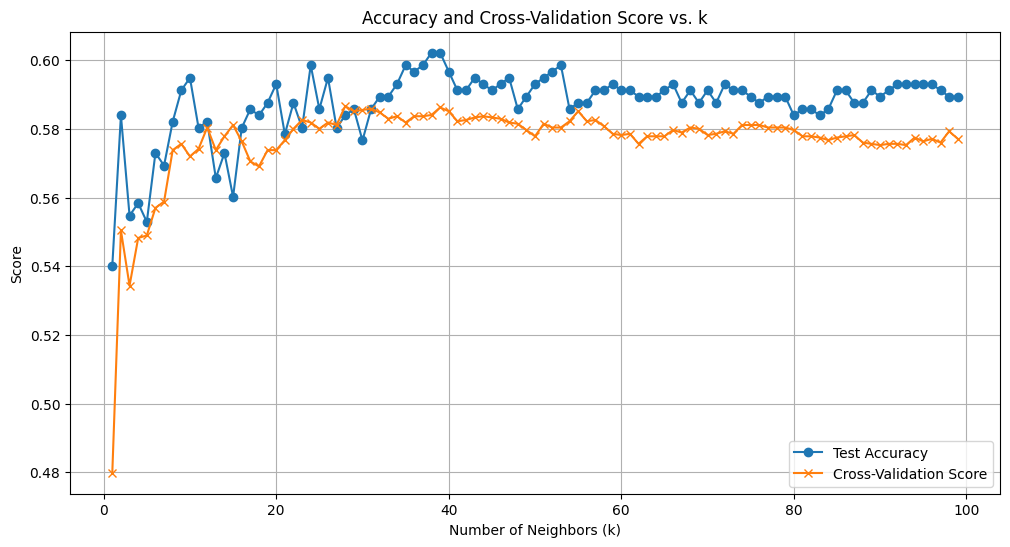

In [25]:
print_analysis()

In [26]:
#for f in train.columns:
    #print ("Feature {:} -> Scale: {:7.2f}".format(f, train.loc[:,f].max() - train.loc[:,f].min()) )

Now I'm gonna try with two different scales

In [ ]:
#MinMaxScaler:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.20, random_state=42)

graph_accuaracies = []
graph_scores      = []

scaler = MinMaxScaler()


X_train_MinMax_scaled = scaler.fit_transform(X_train)
X_test_MinMax_scaled = scaler.transform(X_test)

for k in region:
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train_MinMax_scaled, y_train)
    y_pred = kNN.predict(X_test_MinMax_scaled)

    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    graph_accuaracies.append(acc)
    scr = cross_val_score(kNN, train, y, cv=5).mean()
    graph_scores.append(scr)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc), " | Cross validation score {:.3f}".format(scr))

k:  1 | Accuracy 0.489  | Cross validation score 0.480
k:  2 | Accuracy 0.560  | Cross validation score 0.550
k:  3 | Accuracy 0.540  | Cross validation score 0.534
k:  4 | Accuracy 0.557  | Cross validation score 0.548
k:  5 | Accuracy 0.555  | Cross validation score 0.549
k:  6 | Accuracy 0.566  | Cross validation score 0.557
k:  7 | Accuracy 0.555  | Cross validation score 0.559
k:  8 | Accuracy 0.580  | Cross validation score 0.574
k:  9 | Accuracy 0.582  | Cross validation score 0.576
k: 10 | Accuracy 0.589  | Cross validation score 0.572
k: 11 | Accuracy 0.595  | Cross validation score 0.574
k: 12 | Accuracy 0.599  | Cross validation score 0.580
k: 13 | Accuracy 0.599  | Cross validation score 0.574
k: 14 | Accuracy 0.600  | Cross validation score 0.578
k: 15 | Accuracy 0.600  | Cross validation score 0.581
k: 16 | Accuracy 0.602  | Cross validation score 0.576
k: 17 | Accuracy 0.606  | Cross validation score 0.571
k: 18 | Accuracy 0.609  | Cross validation score 0.569
k: 19 | Ac

Now I would like to plot the improvements of my model with the variation of k:

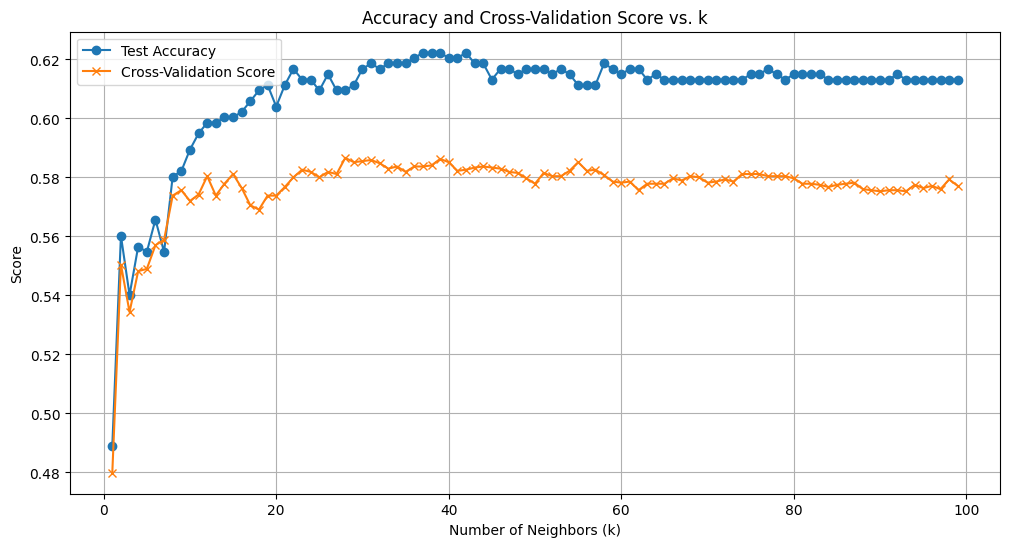

In [32]:
print_analysis()

In [37]:
#StandardScaler:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.20, random_state=42)

graph_accuaracies = []
graph_scores      = []

scaler = StandardScaler()

X_train_Std_scaled = scaler.fit_transform(X_train)
X_test_Std_scaled = scaler.transform(X_test)

for k in region:
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train_Std_scaled, y_train)
    y_pred = kNN.predict(X_test_Std_scaled)

    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    graph_accuaracies.append(acc)
    scr = cross_val_score(kNN, train, y, cv=5).mean()
    graph_scores.append(scr)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc), " | Cross validation score {:.3f}".format(scr))

k:  1 | Accuracy 0.493  | Cross validation score 0.480
k:  2 | Accuracy 0.578  | Cross validation score 0.550
k:  3 | Accuracy 0.569  | Cross validation score 0.534
k:  4 | Accuracy 0.589  | Cross validation score 0.548
k:  5 | Accuracy 0.588  | Cross validation score 0.549
k:  6 | Accuracy 0.593  | Cross validation score 0.557
k:  7 | Accuracy 0.589  | Cross validation score 0.559
k:  8 | Accuracy 0.600  | Cross validation score 0.574
k:  9 | Accuracy 0.604  | Cross validation score 0.576
k: 10 | Accuracy 0.608  | Cross validation score 0.572
k: 11 | Accuracy 0.613  | Cross validation score 0.574
k: 12 | Accuracy 0.604  | Cross validation score 0.580
k: 13 | Accuracy 0.615  | Cross validation score 0.574
k: 14 | Accuracy 0.604  | Cross validation score 0.578
k: 15 | Accuracy 0.611  | Cross validation score 0.581
k: 16 | Accuracy 0.611  | Cross validation score 0.576
k: 17 | Accuracy 0.606  | Cross validation score 0.571
k: 18 | Accuracy 0.606  | Cross validation score 0.569
k: 19 | Ac

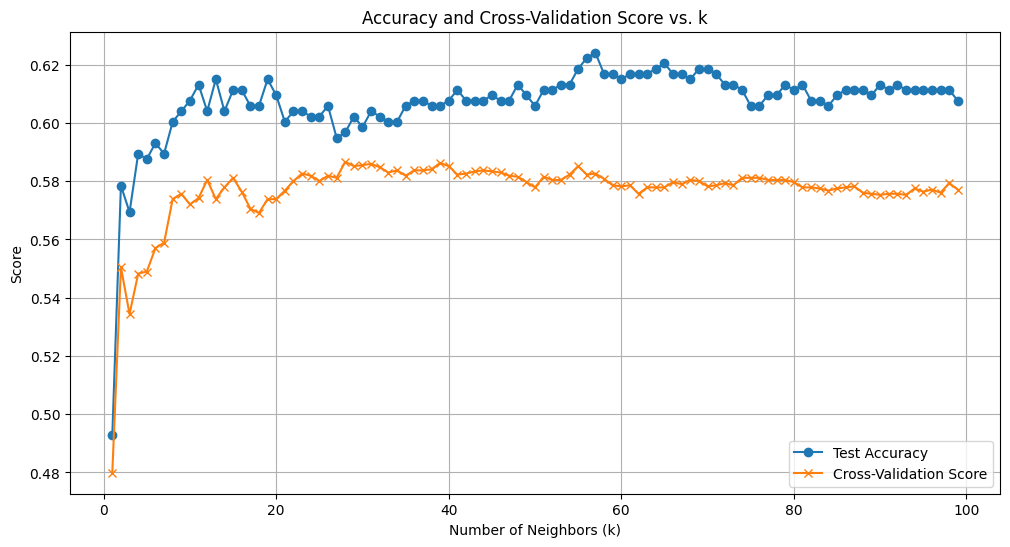

In [38]:
print_analysis()

Come possiamo vedere la gran parte dei miglioramenti sono ottenuti tra i 30 ed i 70 neighbours. Restringo quindi i miei bound

Mi estraggo la feature importance, le normalizzo e computo il classifier con le features pesate.
Provo poi ad utilizzare una custom distance basata sulla mia feature importance

In [39]:
lower_bound = 25
upper_bound = 75

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest to compute feature importance
rf = RandomForestClassifier(n_estimators=55, random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
importances = rf.feature_importances_

# Normalize importance values to [0, 1]
normalized_importances = importances / importances.max()

In [42]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(train)
X_weigthed = X_scaled * normalized_importances

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_weigthed, y, test_size=0.20, random_state=42)

graph_accuaracies = []
graph_scores      = []

for k in range(lower_bound, upper_bound):
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train, y_train)
    y_pred = kNN.predict(X_test_Std_scaled)

    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    graph_accuaracies.append(acc)
    scr = cross_val_score(kNN, train, y, cv=5).mean()
    graph_scores.append(scr)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc), " | Cross validation score {:.3f}".format(scr))

k: 25 | Accuracy 0.617  | Cross validation score 0.580
k: 26 | Accuracy 0.613  | Cross validation score 0.582
k: 27 | Accuracy 0.611  | Cross validation score 0.581
k: 28 | Accuracy 0.615  | Cross validation score 0.587
k: 29 | Accuracy 0.617  | Cross validation score 0.585
k: 30 | Accuracy 0.617  | Cross validation score 0.586
k: 31 | Accuracy 0.619  | Cross validation score 0.586
k: 32 | Accuracy 0.624  | Cross validation score 0.585
k: 33 | Accuracy 0.617  | Cross validation score 0.583
k: 34 | Accuracy 0.615  | Cross validation score 0.584
k: 35 | Accuracy 0.626  | Cross validation score 0.582
k: 36 | Accuracy 0.620  | Cross validation score 0.584
k: 37 | Accuracy 0.624  | Cross validation score 0.584
k: 38 | Accuracy 0.619  | Cross validation score 0.584
k: 39 | Accuracy 0.619  | Cross validation score 0.586
k: 40 | Accuracy 0.619  | Cross validation score 0.585
k: 41 | Accuracy 0.617  | Cross validation score 0.582
k: 42 | Accuracy 0.617  | Cross validation score 0.583
k: 43 | Ac

Proviamo ora il secondo tentativo:

In [48]:
from scipy.spatial.distance import minkowski

def weighted_minkowski(u, v, weights):
    return minkowski(u * weights, v * weights, p=2)

In [51]:
weights = normalized_importances  # Use normalized feature importances

X_train, X_test, y_train, y_test = train_test_split(X_weigthed, y, test_size=0.20, random_state=42)

graph_accuaracies = []
graph_scores      = []

#for k in range(lower_bound, upper_bound):
knn = KNeighborsClassifier(n_neighbors=53, metric=lambda u, v: weighted_minkowski(u, v, weights))
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
graph_accuaracies.append(acc)
scr = cross_val_score(knn, train, y, cv=5).mean()
graph_scores.append(scr)
print ("k: {:2d} | Accuracy {:.3f}".format(k,acc), " | Cross validation score {:.3f}".format(scr))

k: 26 | Accuracy 0.624  | Cross validation score 0.583


In [ ]:
print_analysis()